In [ ]:
#3.1
#problem 1
import pandas as pd

df = pd.read_csv("bank.csv")

object_columns = df.select_dtypes(include='object')
print("Columns with dtype=object:\n", object_columns.columns)

print("\nUnique values per object column:")
for col in object_columns.columns:
    print(f"\nColumn: {col}")
    print(df[col].unique())

print("\nNull values per column:")
print(df.isnull().sum())

df_numeric = df.drop(columns=object_columns.columns)
df_numeric.to_csv("banknumericdata.csv", index=False)

df_numeric_loaded = pd.read_csv("banknumericdata.csv")
print("\nSummary statistics of banknumericdata.csv:")
print(df_numeric_loaded.describe())

Columns with dtype=object:
 Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

Unique values per object column:

Column: job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

Column: marital
['married' 'single' 'divorced']

Column: education
['tertiary' 'secondary' 'unknown' 'primary']

Column: default
['no' 'yes']

Column: housing
['yes' 'no']

Column: loan
['no' 'yes']

Column: contact
['unknown' 'cellular' 'telephone']

Column: month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

Column: poutcome
['unknown' 'failure' 'other' 'success']

Column: y
['no' 'yes']

Null values per column:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign    

In [ ]:
#problem 2
import pandas as pd

med = pd.read_csv("medical_students_dataset.csv")

null_counts = med.isnull().sum()
missing_cols = null_counts[null_counts > 0]
print("Columns with missing values:\n", missing_cols)

for col in missing_cols.index:
    if med[col].dtype == 'object':
        med[col].fillna(med[col].mode()[0], inplace=True)
        print(f"Filled '{col}' with MODE.")
    else:
        med[col].fillna(med[col].median(), inplace=True)
        print(f"Filled '{col}' with MEDIAN.")

duplicates = med.duplicated().sum()
print("\nNumber of duplicate rows:", duplicates)

if duplicates > 0:
    med = med.drop_duplicates()
    print("Duplicates removed.")

Columns with missing values:
 Student ID        20000
Age               20000
Gender            20000
Height            20000
Weight            20000
Blood Type        20000
BMI               20000
Temperature       20000
Heart Rate        20000
Blood Pressure    20000
Cholesterol       20000
Diabetes          20000
Smoking           20000
dtype: int64
Filled 'Student ID' with MEDIAN.
Filled 'Age' with MEDIAN.
Filled 'Gender' with MODE.
Filled 'Height' with MEDIAN.
Filled 'Weight' with MEDIAN.
Filled 'Blood Type' with MODE.
Filled 'BMI' with MEDIAN.
Filled 'Temperature' with MEDIAN.
Filled 'Heart Rate' with MEDIAN.
Filled 'Blood Pressure' with MEDIAN.
Filled 'Cholesterol' with MEDIAN.
Filled 'Diabetes' with MODE.
Filled 'Smoking' with MODE.


C:\Users\user\AppData\Local\Temp\ipykernel_20048\4036956584.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  med[col].fillna(med[col].median(), inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_20048\4036956584.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa


Number of duplicate rows: 12879
Duplicates removed.


In [ ]:
#3.2
#problem 1
import pandas as pd

df = pd.read_csv("Titanic-Dataset.csv")

subset = df[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]

first_class = subset[subset['Pclass'] == 1]

mean_fare = first_class['Fare'].mean()
median_fare = first_class['Fare'].median()
max_fare = first_class['Fare'].max()
min_fare = first_class['Fare'].min()

mean_fare, median_fare, max_fare, min_fare

(np.float64(84.1546875),
 np.float64(60.287499999999994),
 np.float64(512.3292),
 np.float64(0.0))

In [ ]:
#problem 2
null_age = first_class['Age'].isnull().sum()
print("Null values in Age:", null_age)

first_class_clean = first_class.dropna(subset=['Age'])
first_class_clean.head()

Null values in Age: 30


,Name,Pclass,Sex,Age,Fare,Survived
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,71.2833,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,53.1000,1
6,"McCarthy, Mr. Timothy J",1,male,54.0,51.8625,0
11,"Bonnell, Miss. Elizabeth",1,female,58.0,26.5500,1
23,"Sloper, Mr. William Thompson",1,male,28.0,35.5000,1


In [ ]:
#problem 3
embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')

df_encoded = pd.concat([df, embarked_dummies], axis=1)

df_encoded.drop(columns=['Embarked'], inplace=True)

df_encoded.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,AgeGroup,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,"(19.0, 25.0]",False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,"(31.8, 41.0]",True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,"(25.0, 31.8]",False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,"(31.8, 41.0]",False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,"(31.8, 41.0]",False,False,True


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


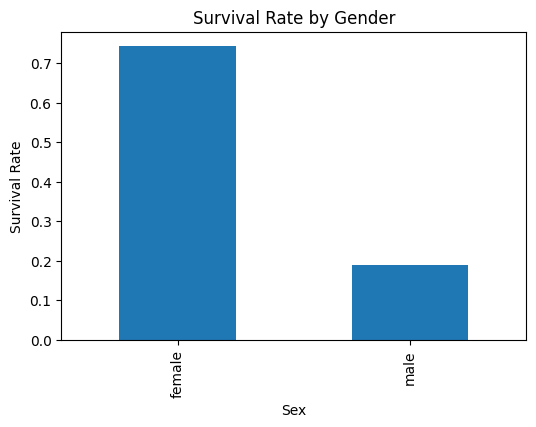

In [ ]:
#problem 4
import matplotlib.pyplot as plt

survival_gender = df.groupby('Sex')['Survived'].mean()
print(survival_gender)

plt.figure(figsize=(6,4))
survival_gender.plot(kind='bar')
plt.title("Survival Rate by Gender")
plt.ylabel("Survival Rate")
plt.xlabel("Sex")
plt.show()


Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


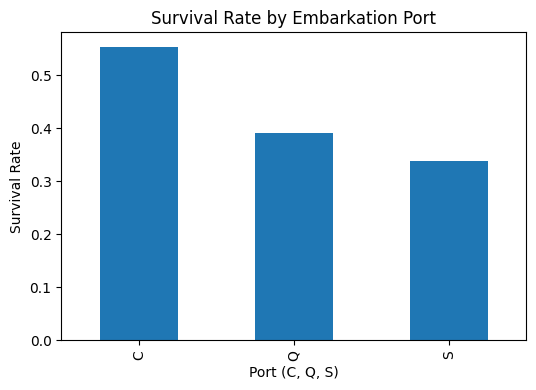

In [ ]:
#problem 5
df_clean = df.dropna(subset=['Embarked'])

survival_port = df_clean.groupby('Embarked')['Survived'].mean()
print(survival_port)

plt.figure(figsize=(6,4))
survival_port.plot(kind='bar')
plt.title("Survival Rate by Embarkation Port")
plt.ylabel("Survival Rate")
plt.xlabel("Port (C, Q, S)")
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_29792\2602361287.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_age_class = df.groupby(['Pclass', 'AgeGroup'])['Survived'].mean()


Pclass  AgeGroup     
1       (0.419, 19.0]    0.809524
        (19.0, 25.0]     0.761905
        (25.0, 31.8]     0.666667
        (31.8, 41.0]     0.777778
        (41.0, 80.0]     0.506667
2       (0.419, 19.0]    0.742857
        (19.0, 25.0]     0.400000
        (25.0, 31.8]     0.416667
        (31.8, 41.0]     0.461538
        (41.0, 80.0]     0.363636
3       (0.419, 19.0]    0.333333
        (19.0, 25.0]     0.197674
        (25.0, 31.8]     0.283582
        (31.8, 41.0]     0.166667
        (41.0, 80.0]     0.088235
Name: Survived, dtype: float64


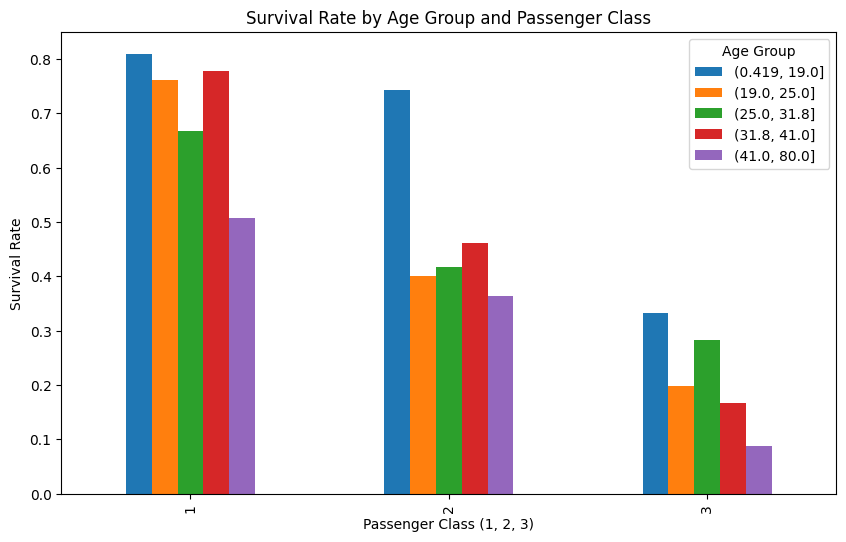

In [ ]:
#problem 6
df['AgeGroup'] = pd.qcut(df['Age'], 5, duplicates='drop')

survival_age_class = df.groupby(['Pclass', 'AgeGroup'])['Survived'].mean()
print(survival_age_class)

survival_age_class.unstack().plot(kind='bar', figsize=(10,6))
plt.title("Survival Rate by Age Group and Passenger Class")
plt.ylabel("Survival Rate")
plt.xlabel("Passenger Class (1, 2, 3)")
plt.legend(title="Age Group")
plt.show()
